In [14]:
%matplotlib inline
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plt
print sys.version
print "pandas.version:", pd.__version__

2.7.6 (default, Mar 22 2014, 22:59:56) 
[GCC 4.8.2]
pandas.version: 0.17.1


In [35]:
df = pd.read_csv('../../data/date_fixed_running_data_with_time.csv', parse_dates=['Date'], usecols=range(6))

In [36]:
df.head()

,Date,Miles,Time,Seconds,Minutes,Min_per_mile
0,2014-08-02,1.70,NaN,NaN,NaN,NaN
1,2014-08-03,1.40,NaN,NaN,NaN,NaN
2,2014-08-04,2.10,NaN,NaN,NaN,NaN
3,2014-08-05,0.00,NaN,NaN,NaN,NaN
4,2014-08-06,2.38,NaN,NaN,NaN,NaN


In [5]:
df.dtypes

Date            datetime64[ns]
Miles                  float64
Time                    object
Seconds                float64
Minutes                float64
Min_per_mile           float64
dtype: object

In [9]:
?pd.read_csv

In [37]:
type(df.Minutes)

pandas.core.series.Series

In [39]:
df.Minutes.max()

260.71666666666664

In [40]:
df.max()

Date            2015-01-01 00:00:00
Miles                          26.2
Time                        4:20:43
Seconds                       15643
Minutes                     260.717
Min_per_mile                     10
dtype: object

In [41]:
df.Minutes.min()

6.2666666666666675

In [42]:
df.describe()

,Miles,Seconds,Minutes,Min_per_mile
count,166.000000,52.000000,52.000000,52.000000
mean,1.530964,1901.788462,31.696474,7.725297
std,2.979802,2560.424171,42.673736,0.954475
min,0.000000,376.000000,6.266667,6.000000
25%,0.000000,583.750000,9.729167,7.020479
50%,0.000000,1343.500000,22.391667,7.533333
75%,2.007500,1743.250000,29.054167,8.480023
max,26.200000,15643.000000,260.716667,10.000000


In [43]:
df.Miles[df.Miles > 0].min()

0.65000000000000002

In [44]:
df[df.Miles> 0].describe()

,Miles,Seconds,Minutes,Min_per_mile
count,81.000000,52.000000,52.000000,52.000000
mean,3.137531,1901.788462,31.696474,7.725297
std,3.634519,2560.424171,42.673736,0.954475
min,0.650000,376.000000,6.266667,6.000000
25%,1.370000,583.750000,9.729167,7.020479
50%,2.100000,1343.500000,22.391667,7.533333
75%,3.050000,1743.250000,29.054167,8.480023
max,26.200000,15643.000000,260.716667,10.000000


In [45]:
df.Miles.value_counts()

0.00     85
1.37     14
3.05     11
1.50      7
1.34      3
5.30      2
2.50      2
2.00      2
0.90      2
3.00      2
0.65      2
14.80     2
3.10      2
5.63      2
2.30      1
2.93      1
4.00      1
1.78      1
12.00     1
1.00      1
1.26      1
6.50      1
3.40      1
2.21      1
5.00      1
1.87      1
2.10      1
1.42      1
1.70      1
4.03      1
5.20      1
2.35      1
1.20      1
26.20     1
2.01      1
4.63      1
1.40      1
1.67      1
3.15      1
3.36      1
2.38      1
4.08      1
Name: Miles, dtype: int64

In [46]:
df[df.Miles>0].Miles.value_counts()

1.37     14
3.05     11
1.50      7
1.34      3
2.00      2
3.00      2
3.10      2
0.90      2
5.30      2
2.50      2
5.63      2
0.65      2
14.80     2
2.01      1
26.20     1
2.35      1
4.00      1
3.40      1
6.50      1
1.26      1
12.00     1
5.20      1
1.00      1
2.30      1
1.40      1
1.78      1
2.93      1
4.63      1
1.67      1
2.21      1
1.20      1
3.15      1
4.08      1
3.36      1
1.42      1
2.38      1
4.03      1
1.70      1
5.00      1
1.87      1
2.10      1
Name: Miles, dtype: int64

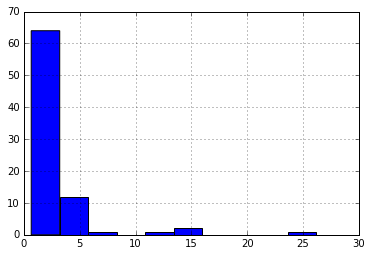

In [48]:
df[df.Miles > 0].Miles.hist()

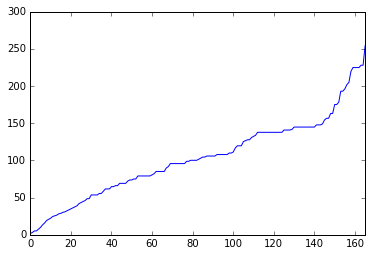

In [52]:
df.Miles.cumsum().plot()

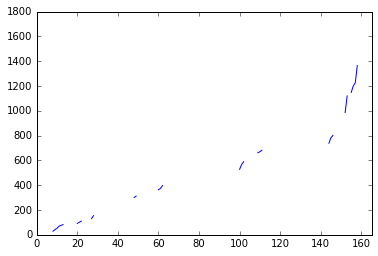

In [55]:
df.Minutes.cumsum().plot()#there are so many nan values

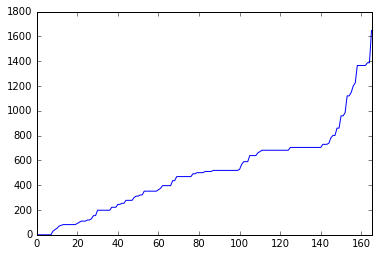

In [56]:
df.Minutes.fillna(0).cumsum().plot()

In [60]:
print df.Date[0]
df.Date[0].strftime("%A")

2014-08-02 00:00:00


'Saturday'

In [72]:
df['Day_of_week'] = df.Date.map(lambda x : x.strftime("%A"))

In [73]:
df.head(10)

,Date,Miles,Time,Seconds,Minutes,Min_per_mile,Day_of_week
0,2014-08-02,1.70,NaN,NaN,NaN,NaN,Saturday
1,2014-08-03,1.40,NaN,NaN,NaN,NaN,Sunday
2,2014-08-04,2.10,NaN,NaN,NaN,NaN,Monday
3,2014-08-05,0.00,NaN,NaN,NaN,NaN,Tuesday
4,2014-08-06,2.38,NaN,NaN,NaN,NaN,Wednesday
5,2014-08-07,2.30,NaN,NaN,NaN,NaN,Thursday
6,2014-08-08,3.40,NaN,NaN,NaN,NaN,Friday
7,2014-08-09,2.50,NaN,NaN,NaN,NaN,Saturday
8,2014-08-10,3.36,0:28:37,1717,28.616667,8.516865,Sunday
9,2014-08-11,1.67,0:13:07,787,13.116667,7.854291,Monday


Saturday     27
Monday       25
Thursday     23
Friday       23
Tuesday      23
Sunday       23
Wednesday    22
Name: Day_of_week, dtype: int64


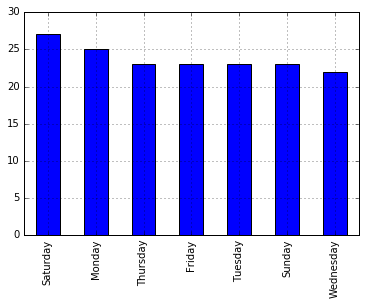

In [76]:

print df.Day_of_week.value_counts()
df.Day_of_week.value_counts().plot(kind='bar')
plt.grid(True)

Friday       15
Saturday     14
Monday       14
Tuesday      11
Sunday       11
Wednesday     8
Thursday      8
Name: Day_of_week, dtype: int64


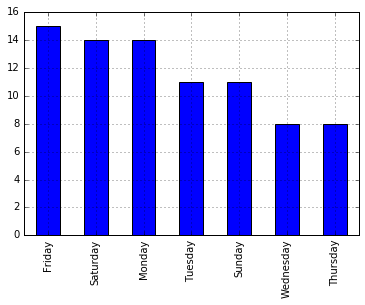

In [77]:
print df[df.Miles>0].Day_of_week.value_counts()
df[df.Miles>0].Day_of_week.value_counts().plot(kind='bar')
plt.grid(True)

In [78]:
del(df['Time'])

In [79]:
df.head()

,Date,Miles,Seconds,Minutes,Min_per_mile,Day_of_week
0,2014-08-02,1.70,NaN,NaN,NaN,Saturday
1,2014-08-03,1.40,NaN,NaN,NaN,Sunday
2,2014-08-04,2.10,NaN,NaN,NaN,Monday
3,2014-08-05,0.00,NaN,NaN,NaN,Tuesday
4,2014-08-06,2.38,NaN,NaN,NaN,Wednesday


In [81]:
df.drop('Seconds', axis=1)

,Date,Miles,Minutes,Min_per_mile,Day_of_week
0,2014-08-02,1.70,NaN,NaN,Saturday
1,2014-08-03,1.40,NaN,NaN,Sunday
2,2014-08-04,2.10,NaN,NaN,Monday
3,2014-08-05,0.00,NaN,NaN,Tuesday
4,2014-08-06,2.38,NaN,NaN,Wednesday
5,2014-08-07,2.30,NaN,NaN,Thursday
6,2014-08-08,3.40,NaN,NaN,Friday
7,2014-08-09,2.50,NaN,NaN,Saturday
8,2014-08-10,3.36,28.616667,8.516865,Sunday
9,2014-08-11,1.67,13.116667,7.854291,Monday


In [82]:
tmpdf = pd.DataFrame(np.arange(4).reshape(2,2))

In [83]:
tmpdf

,0,1
0,0,1
1,2,3


In [85]:
tmpdf.drop(0, axis=0)#drop the Xth cols or rows

,0,1
1,2,3


In [87]:
tmpdf.append(pd.Series([4,5]), ignore_index=True)

,0,1
0,0,1
1,2,3
2,4,5


In [88]:
df.head()

,Date,Miles,Seconds,Minutes,Min_per_mile,Day_of_week
0,2014-08-02,1.70,NaN,NaN,NaN,Saturday
1,2014-08-03,1.40,NaN,NaN,NaN,Sunday
2,2014-08-04,2.10,NaN,NaN,NaN,Monday
3,2014-08-05,0.00,NaN,NaN,NaN,Tuesday
4,2014-08-06,2.38,NaN,NaN,NaN,Wednesday


In [89]:
df.pop('Seconds')

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8       1717
9        787
10       635
11      1045
12       376
13       376
14       NaN
15       NaN
16       NaN
17       NaN
18       NaN
19       NaN
20       573
21       564
22       545
23       NaN
24       NaN
25       535
26       NaN
27       630
28      1500
29       NaN
       ...  
136      NaN
137      NaN
138      NaN
139      NaN
140      NaN
141     1500
142      NaN
143      NaN
144      555
145     2616
146     1139
147      NaN
148     3523
149      NaN
150     5940
151      NaN
152     1575
153     8100
154      NaN
155     1680
156     3110
157     1508
158     8400
159      NaN
160      NaN
161      NaN
162      NaN
163     1330
164      NaN
165    15643
Name: Seconds, dtype: float64

In [90]:
df.head()

,Date,Miles,Minutes,Min_per_mile,Day_of_week
0,2014-08-02,1.70,NaN,NaN,Saturday
1,2014-08-03,1.40,NaN,NaN,Sunday
2,2014-08-04,2.10,NaN,NaN,Monday
3,2014-08-05,0.00,NaN,NaN,Tuesday
4,2014-08-06,2.38,NaN,NaN,Wednesday


In [91]:
ndf = df[df.Miles>0]

In [92]:
ndf.head()

,Date,Miles,Minutes,Min_per_mile,Day_of_week
0,2014-08-02,1.70,NaN,NaN,Saturday
1,2014-08-03,1.40,NaN,NaN,Sunday
2,2014-08-04,2.10,NaN,NaN,Monday
4,2014-08-06,2.38,NaN,NaN,Wednesday
5,2014-08-07,2.30,NaN,NaN,Thursday


In [96]:
dows = ndf.groupby('Day_of_week')

In [98]:
dows.size()

Day_of_week
Friday       15
Monday       14
Saturday     14
Sunday       11
Thursday      8
Tuesday      11
Wednesday     8
dtype: int64

In [99]:
dows.count()

,Date,Miles,Minutes,Min_per_mile
Day_of_week,,,,
Friday,15,15,8,8
Monday,14,14,10,10
Saturday,14,14,6,6
Sunday,11,11,8,8
Thursday,8,8,5,5
Tuesday,11,11,8,8
Wednesday,8,8,7,7


In [100]:
dows.mean()

,Miles,Minutes,Min_per_mile
Day_of_week,,,
Friday,2.786000,24.308333,7.747657
Monday,2.607143,22.243333,7.463291
Saturday,3.246429,46.708333,8.184961
Sunday,2.422727,19.762500,7.463840
Thursday,6.315000,84.530000,8.039543
Tuesday,2.428182,21.770833,7.659706
Wednesday,3.315000,28.021429,7.829348


In [101]:
dows.sum()

,Miles,Minutes,Min_per_mile
Day_of_week,,,
Friday,41.79,194.466667,61.981259
Monday,36.50,222.433333,74.632908
Saturday,45.45,280.250000,49.109769
Sunday,26.65,158.100000,59.710723
Thursday,50.52,422.650000,40.197717
Tuesday,26.71,174.166667,61.277645
Wednesday,26.52,196.150000,54.805434


In [102]:
dows.describe()

Miles     Minutes  Min_per_mile
Day_of_week                                           
Friday      count  15.000000    8.000000      8.000000
            mean    2.786000   24.308333      7.747657
            std     1.510718   15.376198      0.844590
            min     1.200000    9.083333      6.630170
            25%     1.370000    9.625000      7.025547
            50%     3.000000   23.800000      7.803279
            75%     3.250000   30.550000      8.523306
            max     5.630000   49.083333      8.718176
Monday      count  14.000000   10.000000     10.000000
            mean    2.607143   22.243333      7.463291
            std     1.688538   16.318699      1.037698
            min     0.650000    8.600000      6.000000
            25%     1.402500    9.637500      6.677835
            50%     1.885000   17.516667      7.520672
            75%     3.087500   26.795833      7.815719
            max     6.500000   58.716667      9.033333
Saturday    count  14.000000    6.000000      6.000000
            mean    3.246429   46.708333      8.184961
            std     3.592504   45.119311      0.926076
            min     0.650000    9.666667      6.444444
            25%     1.500000   22.487500      8.122780
            50%     1.935000   36.500000      8.408079
            75%     3.685000   42.700000      8.626918
            max    14.800000  135.000000      9.121622
Sunday      count  11.000000    8.000000      8.000000
            mean    2.422727   19.762500      7.463840
            std     1.000241    8.282836      0.578829
            min     1.340000    8.716667      6.362530
            25%     1.450000   11.300000      7.408470
            50%     3.000000   22.591667      7.474317
            75%     3.050000   24.116667      7.533788
            max     4.030000   30.366667      8.516865
Thursday    count   8.000000    5.000000      5.000000
            mean    6.315000   84.530000      8.039543
            std     9.300811  114.032318      1.531027
            min     0.900000    6.266667      6.861314
            25%     0.975000    6.266667      6.962963
            50%     1.835000    9.400000      6.962963
            75%     5.987500  140.000000      9.459459
            max    26.200000  260.716667      9.951018
Tuesday     count  11.000000    8.000000      8.000000
            mean    2.428182   21.770833      7.659706
            std     1.321990   13.777549      0.830158
            min     1.370000    9.083333      6.630170
            25%     1.370000   10.562500      7.218276
            50%     2.000000   22.183333      7.464231
            75%     3.050000   23.350000      7.881281
            max     5.630000   51.833333      9.206631
Wednesday   count   8.000000    7.000000      7.000000
            mean    3.315000   28.021429      7.829348
            std     3.562291   32.039394      1.142713
            min     1.370000    8.950000      6.532847
            25%     1.467500   10.325000      7.185401
            50%     2.365000   17.416667      7.411348
            75%     2.637500   25.066667      8.245219
            max    12.000000   99.000000     10.000000

In [103]:
dows.mean()

,Miles,Minutes,Min_per_mile
Day_of_week,,,
Friday,2.786000,24.308333,7.747657
Monday,2.607143,22.243333,7.463291
Saturday,3.246429,46.708333,8.184961
Sunday,2.422727,19.762500,7.463840
Thursday,6.315000,84.530000,8.039543
Tuesday,2.428182,21.770833,7.659706
Wednesday,3.315000,28.021429,7.829348


In [104]:
dows.std()

,Miles,Minutes,Min_per_mile
Day_of_week,,,
Friday,1.510718,15.376198,0.844590
Monday,1.688538,16.318699,1.037698
Saturday,3.592504,45.119311,0.926076
Sunday,1.000241,8.282836,0.578829
Thursday,9.300811,114.032318,1.531027
Tuesday,1.321990,13.777549,0.830158
Wednesday,3.562291,32.039394,1.142713


In [105]:
for name, group in dows:
    print name
    print group.head()
    break

Friday
         Date  Miles    Minutes  Min_per_mile Day_of_week
6  2014-08-08   3.40        NaN           NaN      Friday
14 2014-08-15   1.78        NaN           NaN      Friday
22 2014-08-22   1.37   9.083333      6.630170      Friday
30 2014-08-29   5.00  43.450000      8.690000      Friday
37 2014-09-05   3.05  23.833333      7.814208      Friday


In [106]:
dows.get_group('Friday').head()

,Date,Miles,Minutes,Min_per_mile,Day_of_week
6,2014-08-08,3.40,NaN,NaN,Friday
14,2014-08-15,1.78,NaN,NaN,Friday
22,2014-08-22,1.37,9.083333,6.630170,Friday
30,2014-08-29,5.00,43.450000,8.690000,Friday
37,2014-09-05,3.05,23.833333,7.814208,Friday


In [111]:
dows.agg(lambda x : len(x))

,Date,Miles,Minutes,Min_per_mile
Day_of_week,,,,
Friday,1970-01-01 00:00:00.000000015,15,15,15
Monday,1970-01-01 00:00:00.000000014,14,14,14
Saturday,1970-01-01 00:00:00.000000014,14,14,14
Sunday,1970-01-01 00:00:00.000000011,11,11,11
Thursday,1970-01-01 00:00:00.000000008,8,8,8
Tuesday,1970-01-01 00:00:00.000000011,11,11,11
Wednesday,1970-01-01 00:00:00.000000008,8,8,8


In [109]:
dows.agg?

In [112]:
df.head()

,Date,Miles,Minutes,Min_per_mile,Day_of_week
0,2014-08-02,1.70,NaN,NaN,Saturday
1,2014-08-03,1.40,NaN,NaN,Sunday
2,2014-08-04,2.10,NaN,NaN,Monday
3,2014-08-05,0.00,NaN,NaN,Tuesday
4,2014-08-06,2.38,NaN,NaN,Wednesday


In [117]:
df['Count'] = 1
df.head()

,Date,Miles,Minutes,Min_per_mile,Day_of_week,Count
0,2014-08-02,1.70,NaN,NaN,Saturday,1
1,2014-08-03,1.40,NaN,NaN,Sunday,1
2,2014-08-04,2.10,NaN,NaN,Monday,1
3,2014-08-05,0.00,NaN,NaN,Tuesday,1
4,2014-08-06,2.38,NaN,NaN,Wednesday,1


In [119]:
ndf.groupbypby("Day_of_week").sum()

AttributeError: 'DataFrame' object has no attribute 'groupbypby'